<a href="https://colab.research.google.com/github/tapomay2006-boop/launched/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading dataset
df = pd.read_csv("student_pass_dataset_large.csv")

In [4]:
#doing EDA
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

   Hours_Study  Hours_Sleep  Previous_Score  Attendance  Pass
0            7            6              53          52     1
1            4            5              67          65     0
2           11            8              20          72     1
3            8            7              35          60     1
4            5            5              80          61     0
(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hours_Study     200 non-null    int64
 1   Hours_Sleep     200 non-null    int64
 2   Previous_Score  200 non-null    int64
 3   Attendance      200 non-null    int64
 4   Pass            200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None
       Hours_Study  Hours_Sleep  Previous_Score  Attendance        Pass
count   200.000000   200.000000      200.000000  200.000000  200.000000
mean      6.020000     5.91

In [5]:
dups = df.duplicated()
print("Number of duplicates:", dups.sum())


Number of duplicates: 0


In [6]:
#checking missing values
print(df.isnull().sum())


Hours_Study       0
Hours_Sleep       0
Previous_Score    0
Attendance        0
Pass              0
dtype: int64


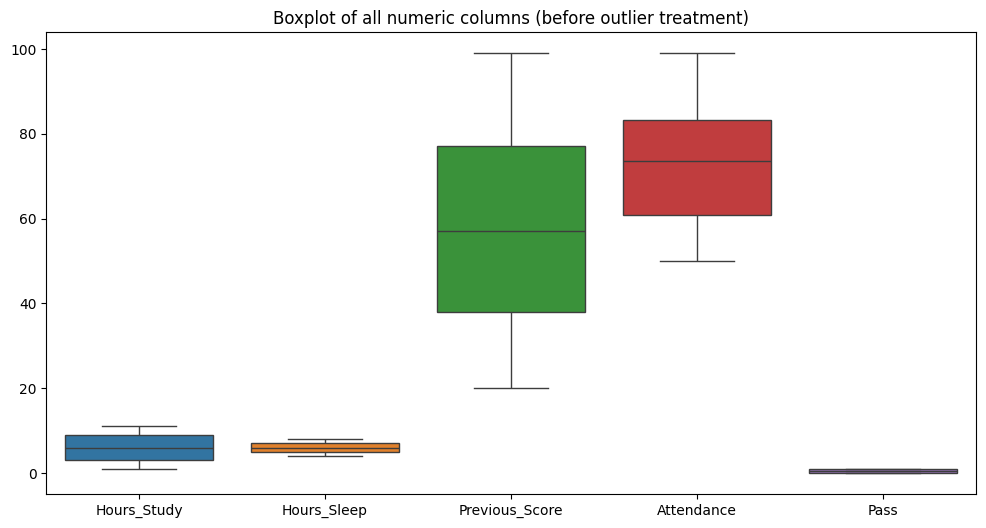

In [7]:
#checking outliers (all columns in one figure)
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns (before outlier treatment)")
plt.show()

<Figure size 800x400 with 0 Axes>

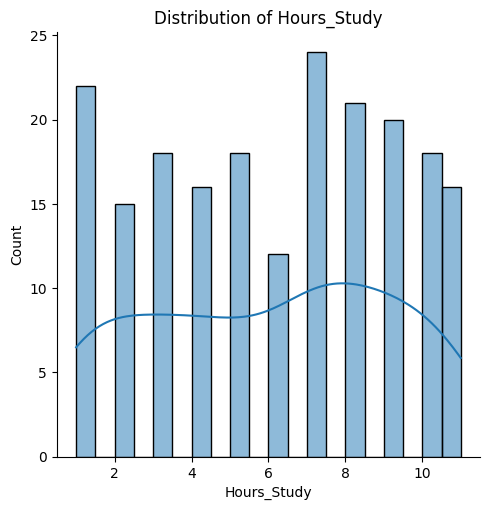

<Figure size 800x400 with 0 Axes>

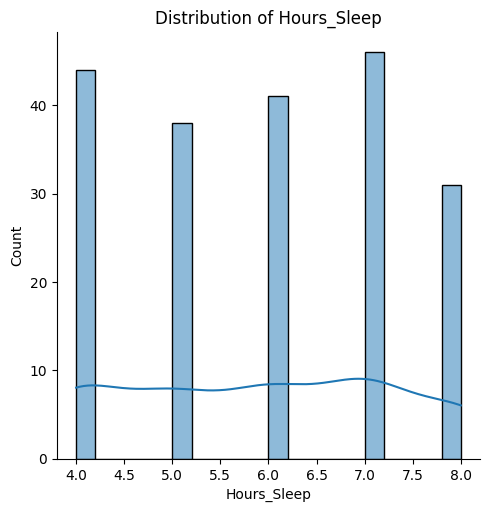

<Figure size 800x400 with 0 Axes>

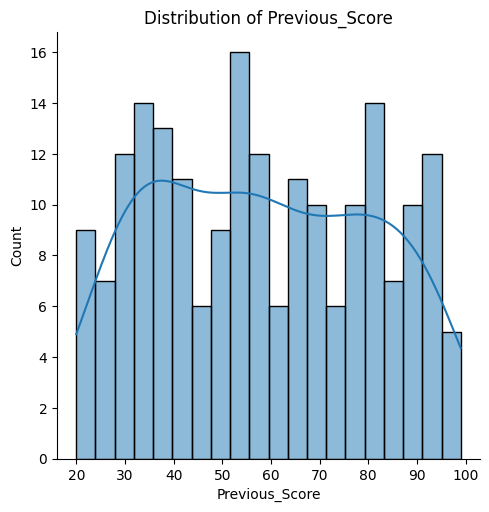

<Figure size 800x400 with 0 Axes>

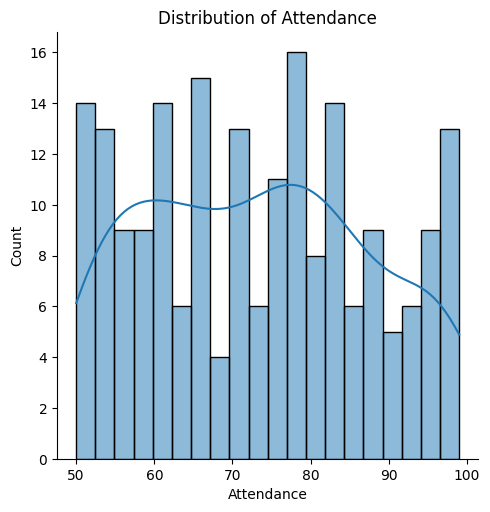

<Figure size 800x400 with 0 Axes>

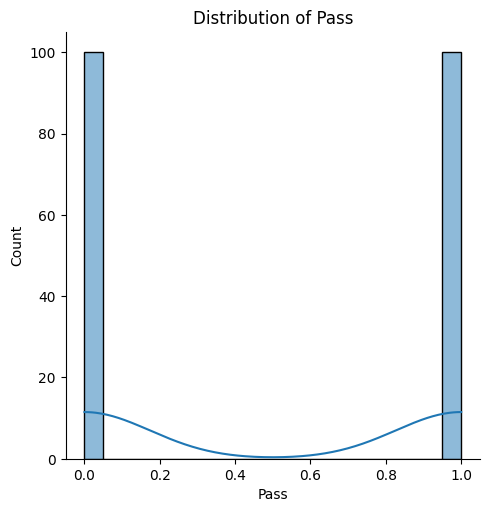

In [8]:
#univariate analysis
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(df[column], bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()



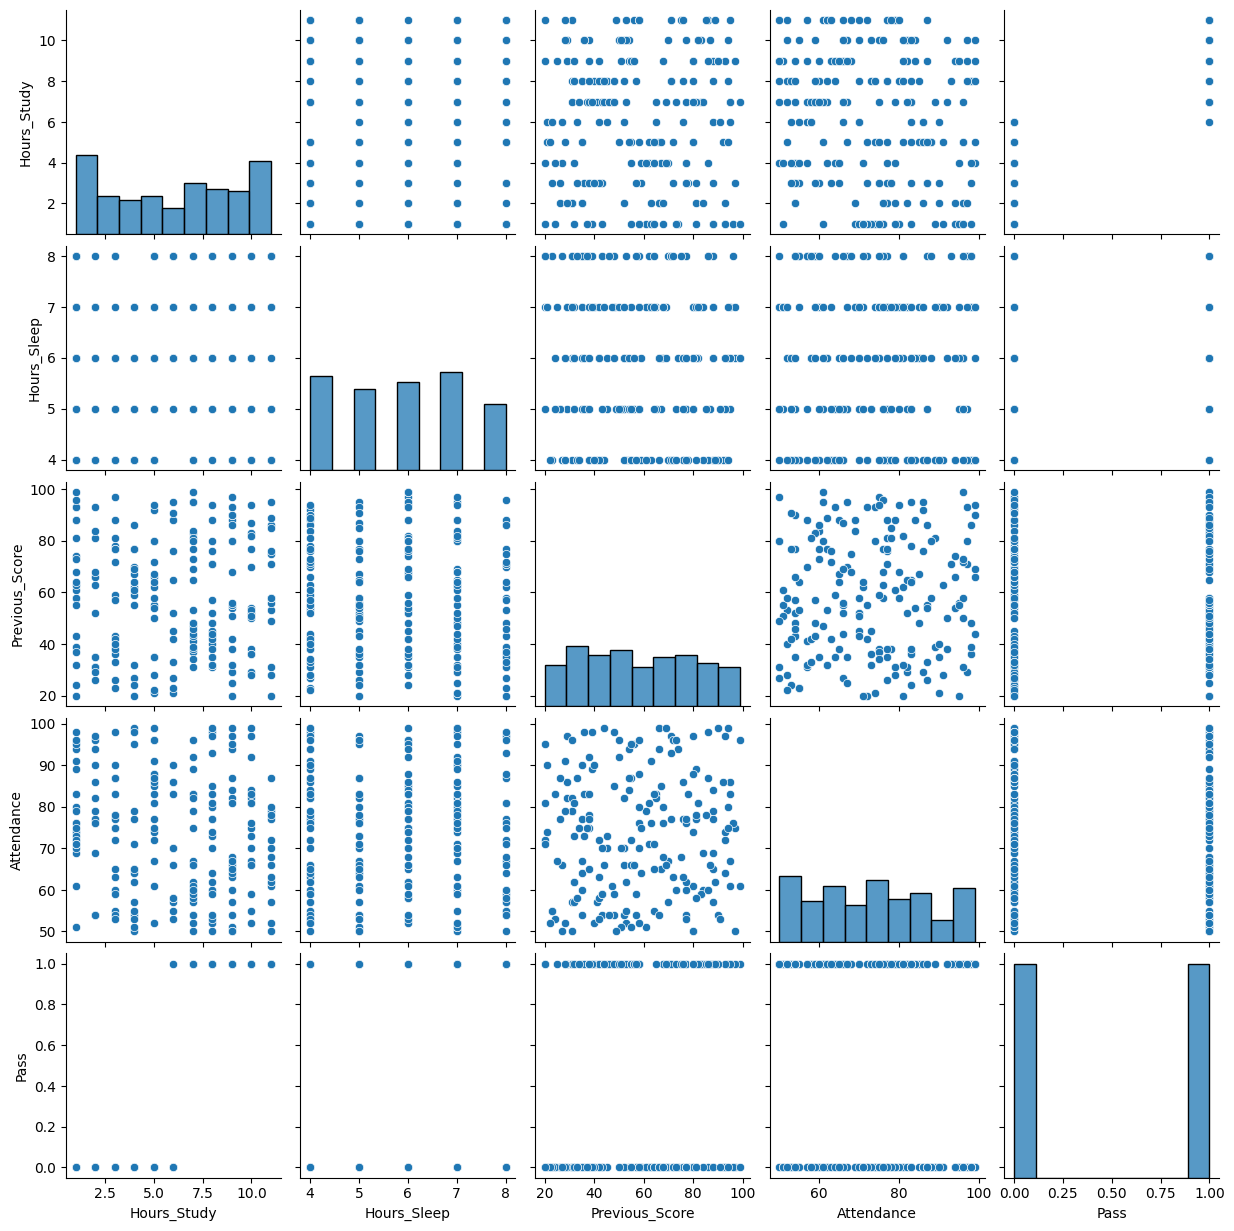

In [9]:
#bivariate analysis
sns.pairplot(df)
plt.show()

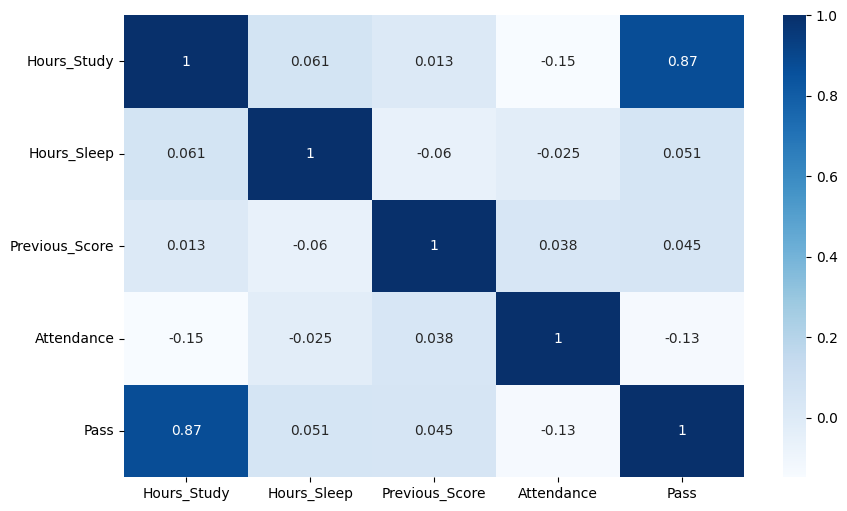

In [10]:
#heatmap plot of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()


In [11]:
#separating the target variable
x = df.drop('Pass', axis=1)
y = df['Pass']

In [12]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
#checking them after standardization
print(x_train[:5])
print(x_test[:5])

[[-0.32072622 -1.40748848 -1.57794555 -1.47627752]
 [-1.56799484  0.79827705  0.46589382  0.45659084]
 [ 1.23835956 -0.67223331 -1.26692651  1.63011806]
 [-0.32072622  0.06302187 -1.00033877  0.2494978 ]
 [ 0.92654241 -1.40748848  1.35451963  0.73271489]]
[[-0.94436053 -1.40748848  0.91020672  0.66368388]
 [ 0.61472525  0.79827705 -0.42273199  0.80174591]
 [ 1.55017672 -1.40748848  0.59918769  0.2494978 ]
 [ 0.92654241 -1.40748848 -0.8670449  -0.57887435]
 [ 0.92654241 -0.67223331  1.57667608 -0.64790536]]


In [15]:
#training logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
#predict result
y_pred = lr.predict(x_test)
print("Predictions:", y_pred)

Predictions: [0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0]


In [17]:
#probability of getting 1 (Pass)
y_pred_prob = lr.predict_proba(x_test)
print("Prediction Probabilities:", y_pred_prob)

Prediction Probabilities: [[9.63284112e-01 3.67158882e-02]
 [1.30224168e-01 8.69775832e-01]
 [9.33349781e-04 9.99066650e-01]
 [1.70908563e-02 9.82909144e-01]
 [1.05459341e-02 9.89454066e-01]
 [5.04458025e-01 4.95541975e-01]
 [9.95914564e-01 4.08543586e-03]
 [9.98696211e-01 1.30378915e-03]
 [2.47789863e-03 9.97522101e-01]
 [1.75815179e-02 9.82418482e-01]
 [5.76324881e-01 4.23675119e-01]
 [9.40824883e-01 5.91751167e-02]
 [3.20711447e-01 6.79288553e-01]
 [6.28996802e-01 3.71003198e-01]
 [9.97310013e-01 2.68998723e-03]
 [4.64146429e-02 9.53585357e-01]
 [9.97784565e-01 2.21543493e-03]
 [1.16778892e-02 9.88322111e-01]
 [1.36832347e-02 9.86316765e-01]
 [1.07683554e-02 9.89231645e-01]
 [2.96545693e-03 9.97034543e-01]
 [9.70446807e-01 2.95531927e-02]
 [8.48273109e-01 1.51726891e-01]
 [9.97126487e-01 2.87351281e-03]
 [9.16873494e-01 8.31265058e-02]
 [9.52126203e-01 4.78737967e-02]
 [3.58654837e-02 9.64134516e-01]
 [9.88645146e-01 1.13548539e-02]
 [2.62355612e-01 7.37644388e-01]
 [1.93333981e-01 

In [18]:
#probability of getting 0 (Fail)
y_pred_prob_fail = y_pred_prob[:,0]
print("Probabilities of Fail:", y_pred_prob_fail)

Probabilities of Fail: [9.63284112e-01 1.30224168e-01 9.33349781e-04 1.70908563e-02
 1.05459341e-02 5.04458025e-01 9.95914564e-01 9.98696211e-01
 2.47789863e-03 1.75815179e-02 5.76324881e-01 9.40824883e-01
 3.20711447e-01 6.28996802e-01 9.97310013e-01 4.64146429e-02
 9.97784565e-01 1.16778892e-02 1.36832347e-02 1.07683554e-02
 2.96545693e-03 9.70446807e-01 8.48273109e-01 9.97126487e-01
 9.16873494e-01 9.52126203e-01 3.58654837e-02 9.88645146e-01
 2.62355612e-01 1.93333981e-01 2.50708385e-03 8.25424332e-01
 9.82287189e-01 1.11797448e-01 9.45626037e-01 3.08819119e-01
 8.98547125e-01 2.06910283e-01 3.88296905e-01 7.14579873e-01
 1.44792449e-01 8.13171577e-01 9.77642399e-01 9.98225259e-01
 9.99207110e-01 7.16105066e-01 1.05138319e-03 9.94998594e-01
 9.66114483e-01 2.96874658e-02 1.64831159e-01 1.51434556e-01
 2.10934886e-01 1.22257465e-01 9.59992060e-01 3.53881585e-01
 9.39653550e-01 4.12847828e-03 6.86644352e-03 9.92442657e-01]


In [19]:
#checking training set accuracy
print("Train Accuracy:", lr.score(x_train,y_train))

Train Accuracy: 1.0


In [20]:
#checking overfitting and underfitting
from sklearn.metrics import accuracy_score
print("Train Accuracy (manual):", accuracy_score(y_train, lr.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy (manual): 1.0
Test Accuracy: 0.9833333333333333


In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[30  1]
 [ 0 29]]


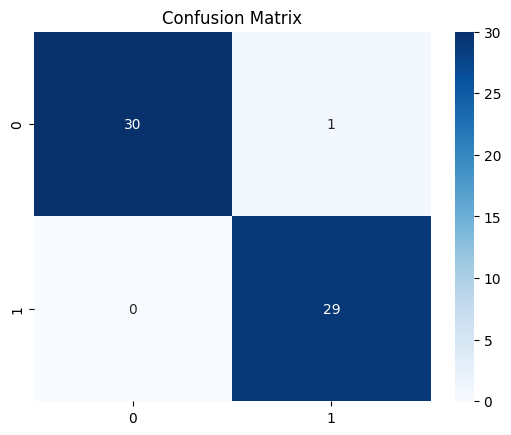

In [22]:
#graphical representation of confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [23]:
#lasso regression and mean squared error
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)
print("Coefficients (Lasso):", lasso.coef_)

Mean Squared Error (Lasso): 0.07494640771101217
Coefficients (Lasso): [ 0.33648038 -0.          0.         -0.        ]


In [24]:
#classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [25]:
#classification accuracy
print("Classification Accuracy:", accuracy_score(y_test,y_pred))

Classification Accuracy: 0.9833333333333333
